# IBM HR Analytics Employee Attrition & Performance

- Data yang digunakan merupakan data fiksi yang dikembangkan oleh data saintis di IBM yang memberikan informasi-informasi terkait data pekerja dan hubungannya dengan pengunduran diri pekerja. 

- Data ini memiliki 1470 objek dan 35 fitur. Karena fiturnya yang banyak, maka pada EDA ini hanya digunakan beberapa fitur saja untuk dianalisis.

- Di EDA ini akan dicari hubungan fitur-fitur terpilih dengan tingkat pengunduran diri karyawan serta rekomendasi berdasarkan data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

In [4]:
# impor data
df = pd.read_csv('D:/data_data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# melihat cuplikan 10 data teratas
pd.set_option("max_column",None)
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


Dari seluruh data di atas kemudian diseleksi menjadi 17 fitur yang akan dianalaisis di EDA ini, yakni:
1. Umur
2. Pengunduran diri
3. Departemen
4. Jarak rumah
5. Pendidikan
6. Bidang pendidikan
7. Kepuasan terhadap lingkungan
8. Keterlibatan dalam bekerja
9. Tingkat pekerjaan
10. Peran di pekerjaan
11. Kepuasan terhadap kerja
12. Overtime (apakah melewati waktu standar bekerja?)
13. Persen kenaikan gaji
14. Peringkat kinerja
15. Lama tahun di perusahaan
16. Gender
17. Gaji perjam
18. Gaji perbulan

In [120]:
data = df[['Age', 'Attrition', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'MonthlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating', 
       'YearsAtCompany']]

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
Age                        1470 non-null int64
Attrition                  1470 non-null object
Department                 1470 non-null object
DistanceFromHome           1470 non-null int64
Education                  1470 non-null int64
EducationField             1470 non-null object
EnvironmentSatisfaction    1470 non-null int64
Gender                     1470 non-null object
HourlyRate                 1470 non-null int64
MonthlyRate                1470 non-null int64
JobInvolvement             1470 non-null int64
JobLevel                   1470 non-null int64
JobRole                    1470 non-null object
JobSatisfaction            1470 non-null int64
OverTime                   1470 non-null object
PercentSalaryHike          1470 non-null int64
PerformanceRating          1470 non-null int64
YearsAtCompany             1470 non-null int64
dtypes: int64(12), object(6)
memory usage

In [123]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features_name = pd.Series(numeric_features.columns)
print('Fitur numerikal :\n', numeric_features_name, '\n')

categorical_features = data.select_dtypes(include=[np.object])
categorical_features_name = pd.Series(categorical_features.columns)
print('Fitur kategorikal :\n', categorical_features_name)

Fitur numerikal :
 0                         Age
1            DistanceFromHome
2                   Education
3     EnvironmentSatisfaction
4                  HourlyRate
5                 MonthlyRate
6              JobInvolvement
7                    JobLevel
8             JobSatisfaction
9           PercentSalaryHike
10          PerformanceRating
11             YearsAtCompany
dtype: object 

Fitur kategorikal :
 0         Attrition
1        Department
2    EducationField
3            Gender
4           JobRole
5          OverTime
dtype: object


In [124]:
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,MonthlyRate,JobInvolvement,JobLevel,JobSatisfaction,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,65.891156,14313.103401,2.729932,2.063946,2.728571,15.209524,3.153741,7.008163
std,9.135373,8.106864,1.024165,1.093082,20.329428,7117.786044,0.711561,1.106940,1.102846,3.659938,0.360824,6.126525
min,18.000000,1.000000,1.000000,1.000000,30.000000,2094.000000,1.000000,1.000000,1.000000,11.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,48.000000,8047.000000,2.000000,1.000000,2.000000,12.000000,3.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,66.000000,14235.500000,3.000000,2.000000,3.000000,14.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,83.750000,20461.500000,3.000000,3.000000,4.000000,18.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,100.000000,26999.000000,4.000000,5.000000,4.000000,25.000000,4.000000,40.000000


## Distribusi pengunduran diri

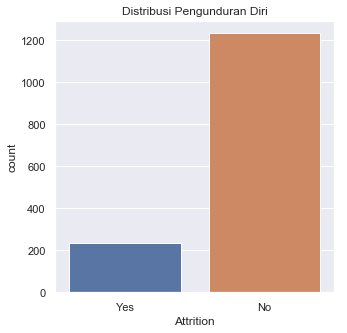

In [125]:
f, ax1 = plt.subplots(figsize=(5,5))
ax1 = sns.countplot(data['Attrition'])
ax1 = plt.title('Distribusi Pengunduran Diri') 

## Distribusi pengunduran diri di fitur-fitur numerik

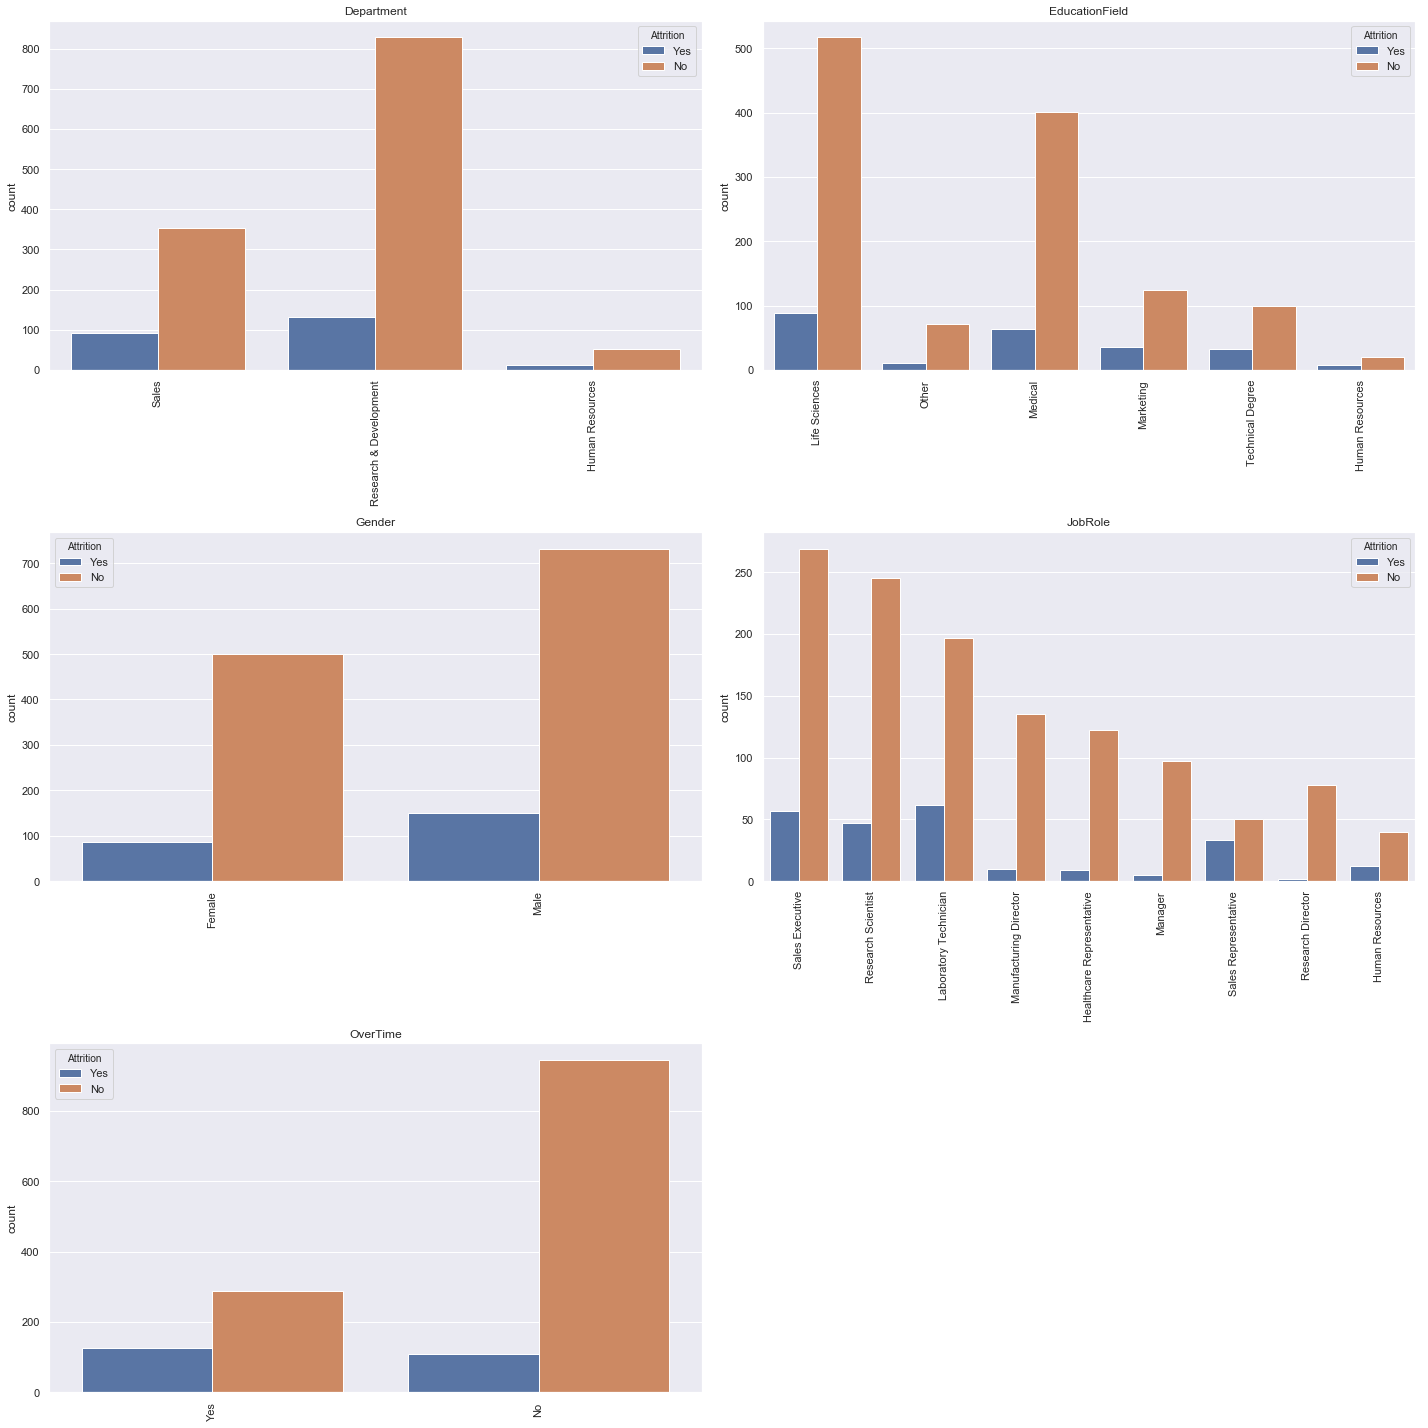

In [126]:
categorical_features_names = categorical_features.columns.values
i=0

plt.figure(figsize=(20,20))
for name in categorical_features_name[1:]:
    plt.subplot(3,2,i+1)
    plt.title(str(name))
    sns.countplot(df[str(name)], hue=df['Attrition'])
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.tight_layout()
    i=i+1
    
plt.show()

1. Pada fitur departemen, jumlah tertinggi adalah departemen RnD begitu juga dengan jumlah karyawan yang mengundurkan diri di antara deparetemen lainnya.
2. Karyawan yang bekerja melebihi waktu standar lebih banyak mengundurkan diri dibandingkan yang tidak melebih waktu standar walaupun jumlah karyawan yang tidak melebihi waktu standar lebih banyak.
3. Jumlah karyawan laki-laki lebih besar yang mengundurkan diri dibandingkan karyawan perempuan, hal ini disebabkan juga karena jumlah karyawan laki-laki lebih besar daripada perempuan.
4. Teknisi laboratorium merupakan jenis pekerjaan yang paling banyak melakukan pengunduran diri, diikuti dengan eksekutif penjualan, dan sales representative.

## Korelasi antar fitur numerik

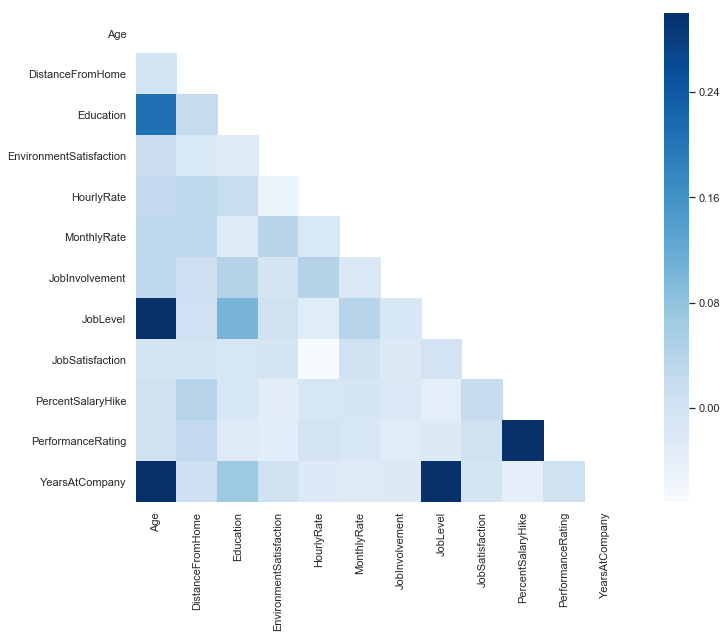

In [127]:
corr = numeric_features.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f = plt.figure(figsize=(14,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='Blues')

Berdasarkan heatmap di atas, terlihat bahwa tidak banyak dari fitur yang dianalisis memberikan korelasi positif terhadap fitur lainnya. Warna biru yang semakin gelap menunjukkan korelasi yang semakin positif antar dua fitur.
1. Fitur umur berkorelasi positif dengan tingkat pendidikan, tingkat jabatan, dan lama bekerja di perusahaan.
2. Seperti di poin sebelumnya, secara langsung tingkat jabatan berkorelasi positif dengan lama bekerja di perusahaan
3. Peningkatan gaji  berkorelasi positif dengan nilai kinerja, sehingga semakin baik kinerja suatu karyawan maka akan mendapatkan peningkatan gaji yang lebih besar.

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


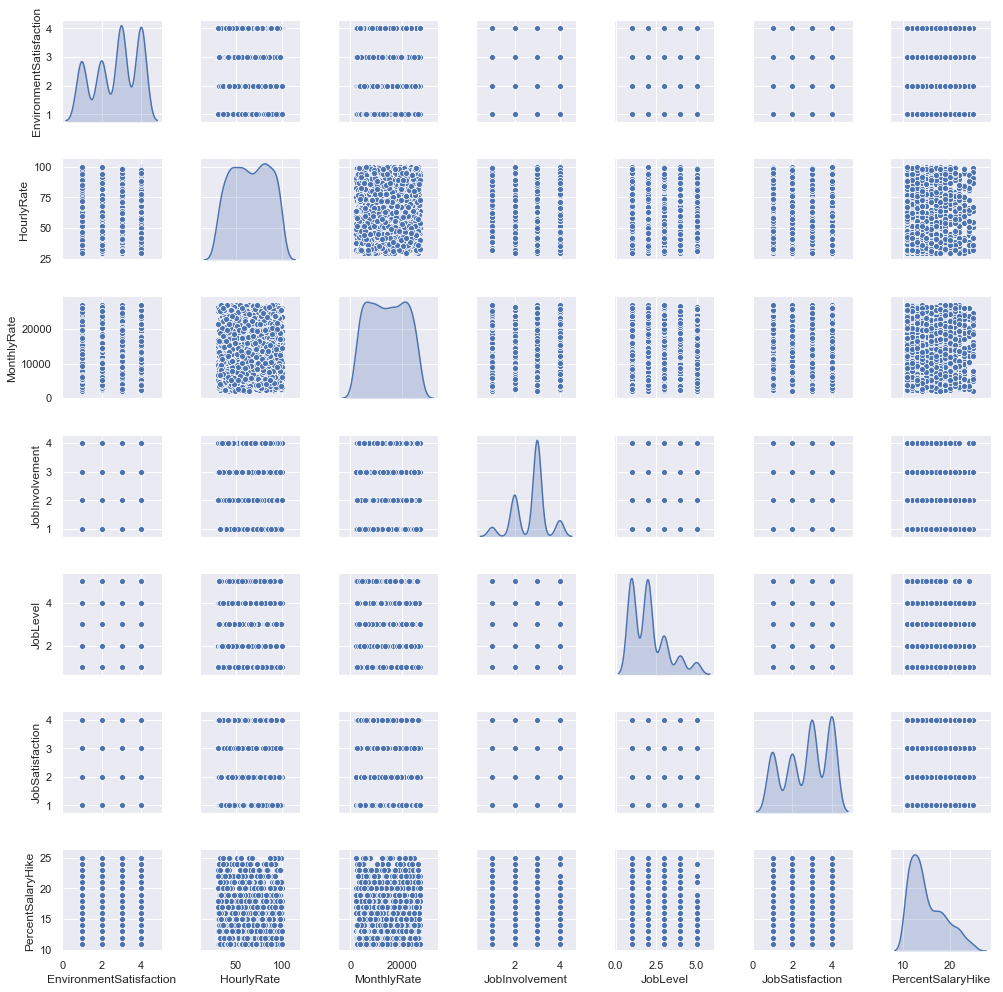

In [129]:
sns.set()
columns = ['EnvironmentSatisfaction',
       'HourlyRate', 'MonthlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'PercentSalaryHike']
sns.pairplot(df[columns],size=2, kind='scatter', diag_kind='kde')
plt.show()

Visualisasi pair plot di atas menunjukkan hal yang sama dengan yang didapat melalui visualisasi heatmap, yakni sebagian besar tidak memberikan korelasi signifikan antar fitur sehingga dapat dilihat bahwa objek tersebar merata di berbagai fitur.

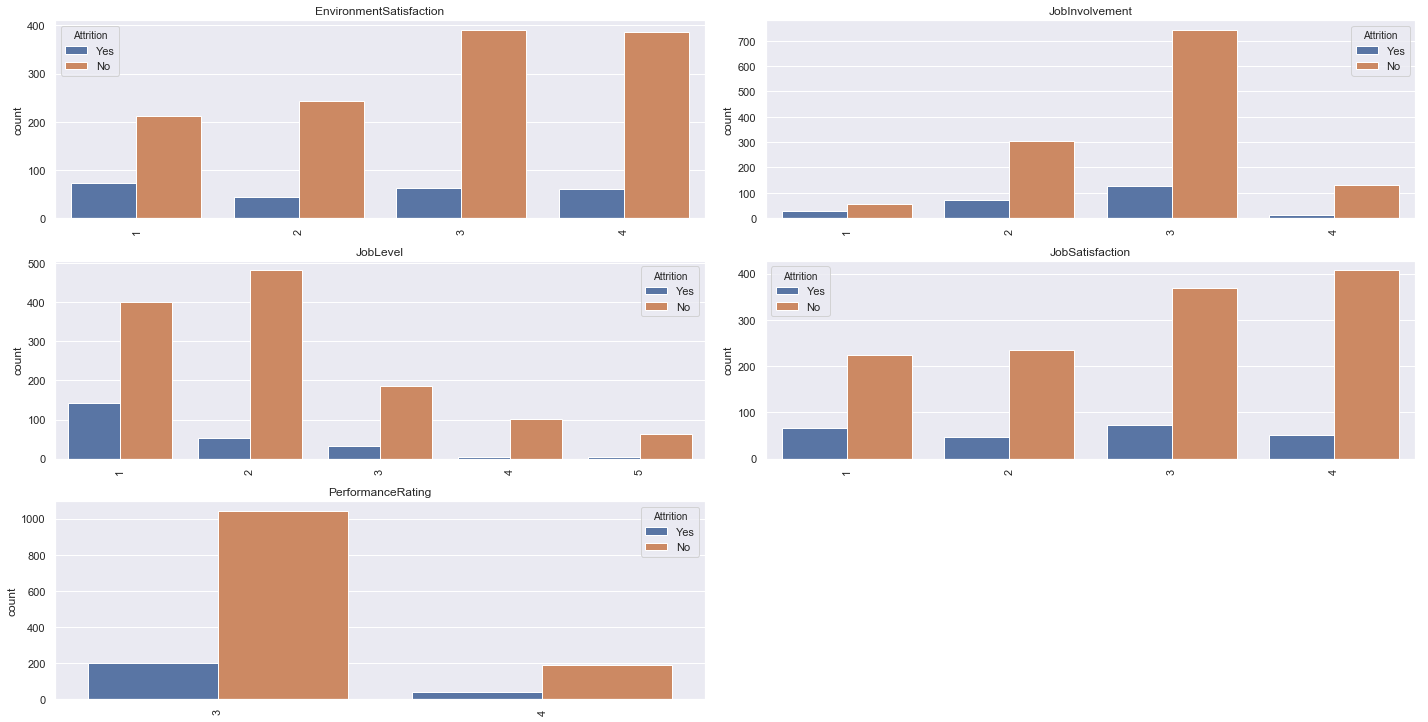

In [132]:
numeric_features_names = numeric_features.columns.values
i=0

columns = ['Attrition,''Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'PerformanceRating']
plt.figure(figsize=(20,20))
for name in columns[1:]:
    plt.subplot(6,2,i+1)
    plt.title(str(name))
    sns.countplot(df[str(name)], hue=df['Attrition'])
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.tight_layout()
    i=i+1
    
plt.show()

1. Grafik pertama menunjukkan bahwa kepuasan terhadap lingkungan kerja yang tinggi menyebabkan tingkat loyalitas yang tinggi pada perusahaan, karena sekalipun data menunjukkan tidak adanya perbedaan signifikan jumlah pengunduran diri namun yang tetap di perusahaan tetap tinggi.
2. Data menunjukkan keterlibatan pada pekerjaan paling banyak di level 3, begitu juga dengan jumlah pengunduran diri.
3. Tingkat jabatan di perusahaan yang masih rendah memberikan peluang untuk melakukan pengunduran diri lebih besar dibandingkan di tingkat jabatan yang tinggi.
4. Seperti dengan faktor kepuasaan terhadap lingkungan, kepuasan terhadap pekerjaan memberikan korelasi postifi dengan jumlah loyalitas
5. Berdasarkan rating kinerja data yang dimiliki yang menempatai level 3 dan 4 saja dengan jumlah yang besar di level 3 untuk loyalitas dan pengunduran diri.

## Kesimpulan

- Peluang seorang karyawan untuk mengundurkan diri dapat disebabkan oleh beberapa faktor di atas, seperti departemen tempat bekerja, jenis pekerjaan, kepuasan terhadap lingkungan dan pekerjaan, serta level pekerjaan. 
- Untuk fitur yang menunjukkan keterkaitan dengan tempat departemen, jenis pekerjaan, dan fitur sejenisnya perlu dilakukan evaluasi lebih mendalam untuk mengetahui penyebab banyaknya pengunduran diri di segmen tersebut. 
- Sedangkan fitur-fitur numerikal memberikan informasi untuk memberikan bentuk kenyamanan yang lebih agar kepuasan terhadap pekerjaan dan lingkungan semakin besar.
- Perlu diperhatikan juga faktor-faktor yang belum dimasukkan di analisis ini serta keterkaitan antar faktor yang dapat dianalisis lebih detil (seperti kepuasan terhadap lingkungan dengan tingkat kinerja, dll).